In [ ]:
데이터 : FRED ( https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv)
    한국과, 미국의 환률 데이터 (2015)

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv', parse_dates=['DATE'], index_col = 'DATE')
df.head()


,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DEXKOUS  1306 non-null   object
dtypes: object(1)
memory usage: 20.4+ KB


In [124]:
#Kous 미국환율이 object로 되어 있어, Dtype 을 실수로 변경
# ' .' 값은 숫자가 아니므로 , 실수로 변환되지 않음

df.columns=['KOUS']
df
df['KOUS'].replace('.', '', inplace=True)
 

In [126]:
 #to_numeric으로 데이터 타입 변경시 "Unable to parse string " " at" 날때, isnull로 인한 에러로 그안에 다른 데이터로 채워주면 됨. 

    
df['KOUS']=pd.to_numeric(df['KOUS'])

# print (df[pd.to_numeric(df['KOUS'], errors='coerce').isnull()])

In [127]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1251 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


In [128]:
#금융데이터의 경우 결측지는 이전 값으로 대체해주어야 한다. 
#dropna 아닌, fillna(method='ffill', inplace =True)

df['KOUS'].fillna(method='ffill', inplace = True)

In [129]:

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   KOUS    1306 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB


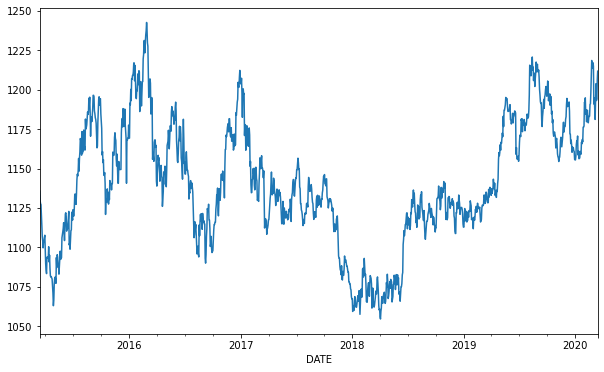

In [130]:
#환률 변동 시각화 
df['KOUS'].plot(figsize=(10,6))

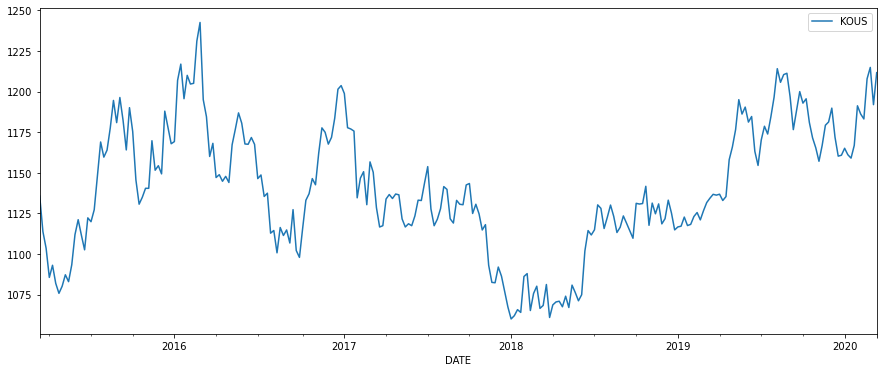

In [139]:
#resample : 일별데이터 -> 주단위 데이터, 월단위 데이터로 변환

# df.resample('M').last()
df.resample('W-Fri').last().plot(figsize=(15,6)) 

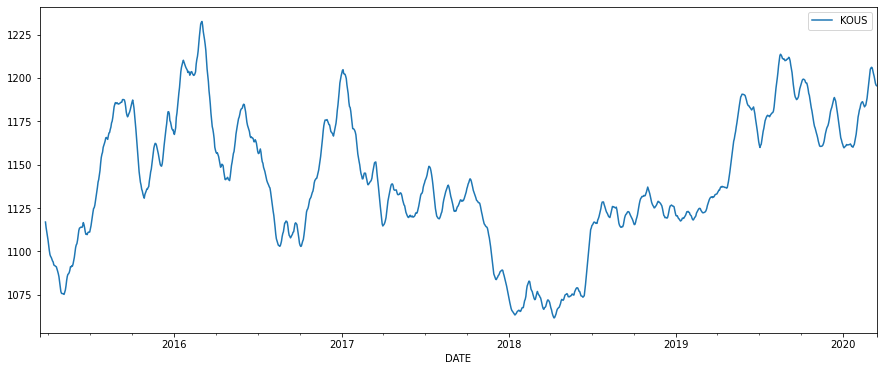

In [142]:
# rolling : 이전 xx일에 대한 이동평균, 이동 sum 을 산출할 때 사용
df.rolling(10).mean().plot(figsize=(15,6))

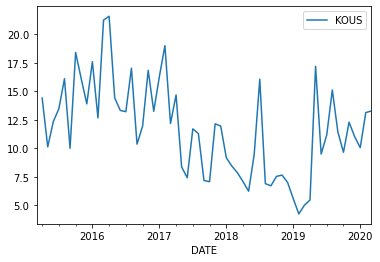

In [143]:
#std : 분산 즉, 환률의 변동성이 평균에서 얼마나 크게 움직이는지. 
#2016년이 가장 환률의 변동성이 컸음을 알 수 있다. 
df.rolling(30).std().resample('M').mean().plot()

In [144]:
#안정성 검정 (ADF Test)
adfuller(df['KOUS'])

(-2.623518803922116,
 0.08823317575724993,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '5%': -2.8637572934525286,
  '10%': -2.56795049999266},
 8358.34690710183)

In [ ]:
#P-value가 0.05보다 작으면, 귀무가설 기각. 즉, 안정적인 시계열 
그러므로 위의 데이터는 0.088므로 P-value가 0.05q보다 크므로, 불안정한 시계열임으로 알수 있다. 


In [146]:
#안정적인 데이터로의 변경 : 변화율/로그 차분 
# y(t+1)/y(t) -1
# log(y(t+1))-log(y(t))

adfuller(df.KOUS.pct_change().dropna())
df.KOUS.pct_change().dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [147]:
(df.KOUS/df.KOUS.shift(1) -1).dropna()


DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KOUS, Length: 1305, dtype: float64

In [148]:
(np.log(df.KOUS)-np.log(df.KOUS.shift(1))).dropna()

DATE
2015-03-16   -0.005368
2015-03-17   -0.001710
2015-03-18   -0.000532
2015-03-19   -0.005231
2015-03-20   -0.006568
                ...   
2020-03-09    0.009809
2020-03-10   -0.008887
2020-03-11    0.000888
2020-03-12    0.010024
2020-03-13    0.004558
Name: KOUS, Length: 1305, dtype: float64